#### Tuesday, January 2, 2024

[Quicktour](https://huggingface.co/docs/diffusers/quicktour)

docker container start hfpt_Dec14

1) pip install diffusers

# Quicktour

Diffusion models are trained to denoise random Gaussian noise step-by-step to generate a sample of interest, such as an image or audio. This has sparked a tremendous amount of interest in generative AI, and you have probably seen examples of diffusion generated images on the internet. 🧨 Diffusers is a library aimed at making diffusion models widely accessible to everyone.

Whether you're a developer or an everyday user, this quicktour will introduce you to 🧨 Diffusers and help you get up and generating quickly! There are three main components of the library to know about:

* The [DiffusionPipeline](https://huggingface.co/docs/diffusers/main/en/api/pipelines/overview#diffusers.DiffusionPipeline) is a high-level end-to-end class designed to rapidly generate samples from pretrained diffusion models for inference.
* Popular pretrained [model](https://huggingface.co/docs/diffusers/main/en/./api/models) architectures and modules that can be used as building blocks for creating diffusion systems.
* Many different [schedulers](https://huggingface.co/docs/diffusers/main/en/./api/schedulers/overview) - algorithms that control how noise is added for training, and how to generate denoised images during inference.

The quicktour will show you how to use the [DiffusionPipeline](https://huggingface.co/docs/diffusers/main/en/api/pipelines/overview#diffusers.DiffusionPipeline) for inference, and then walk you through how to combine a model and scheduler to replicate what's happening inside the [DiffusionPipeline](https://huggingface.co/docs/diffusers/main/en/api/pipelines/overview#diffusers.DiffusionPipeline).

<Tip>

The quicktour is a simplified version of the introductory 🧨 Diffusers [notebook](https://colab.research.google.com/github/huggingface/notebooks/blob/main/diffusers/diffusers_intro.ipynb) to help you get started quickly. If you want to learn more about 🧨 Diffusers goal, design philosophy, and additional details about it's core API, check out the notebook!

</Tip>

Before you begin, make sure you have all the necessary libraries installed:

In [ ]:
# uncomment to install the necessary libraries in Colab
#!pip install --upgrade diffusers accelerate transformers

- [🤗 Accelerate](https://huggingface.co/docs/accelerate/index) speeds up model loading for inference and training.
- [🤗 Transformers](https://huggingface.co/docs/transformers/index) is required to run the most popular diffusion models, such as [Stable Diffusion](https://huggingface.co/docs/diffusers/api/pipelines/stable_diffusion/overview).

## DiffusionPipeline

The [DiffusionPipeline](https://huggingface.co/docs/diffusers/main/en/api/pipelines/overview#diffusers.DiffusionPipeline) is the easiest way to use a pretrained diffusion system for inference. It is an end-to-end system containing the model and the scheduler. You can use the [DiffusionPipeline](https://huggingface.co/docs/diffusers/main/en/api/pipelines/overview#diffusers.DiffusionPipeline) out-of-the-box for many tasks. Take a look at the table below for some supported tasks, and for a complete list of supported tasks, check out the [🧨 Diffusers Summary](https://huggingface.co/docs/diffusers/main/en/./api/pipelines/overview#diffusers-summary) table.

| **Task**                     | **Description**                                                                                              | **Pipeline**
|------------------------------|--------------------------------------------------------------------------------------------------------------|-----------------|
| Unconditional Image Generation          | generate an image from Gaussian noise | [unconditional_image_generation](https://huggingface.co/docs/diffusers/main/en/./using-diffusers/unconditional_image_generation) |
| Text-Guided Image Generation | generate an image given a text prompt | [conditional_image_generation](https://huggingface.co/docs/diffusers/main/en/./using-diffusers/conditional_image_generation) |
| Text-Guided Image-to-Image Translation     | adapt an image guided by a text prompt | [img2img](https://huggingface.co/docs/diffusers/main/en/./using-diffusers/img2img) |
| Text-Guided Image-Inpainting          | fill the masked part of an image given the image, the mask and a text prompt | [inpaint](https://huggingface.co/docs/diffusers/main/en/./using-diffusers/inpaint) |
| Text-Guided Depth-to-Image Translation | adapt parts of an image guided by a text prompt while preserving structure via depth estimation | [depth2img](https://huggingface.co/docs/diffusers/main/en/./using-diffusers/depth2img) |

Start by creating an instance of a [DiffusionPipeline](https://huggingface.co/docs/diffusers/main/en/api/pipelines/overview#diffusers.DiffusionPipeline) and specify which pipeline checkpoint you would like to download.
You can use the [DiffusionPipeline](https://huggingface.co/docs/diffusers/main/en/api/pipelines/overview#diffusers.DiffusionPipeline) for any [checkpoint](https://huggingface.co/models?library=diffusers&sort=downloads) stored on the Hugging Face Hub.
In this quicktour, you'll load the [`stable-diffusion-v1-5`](https://huggingface.co/runwayml/stable-diffusion-v1-5) checkpoint for text-to-image generation.

<Tip warning={true}>

For [Stable Diffusion](https://huggingface.co/CompVis/stable-diffusion) models, please carefully read the [license](https://huggingface.co/spaces/CompVis/stable-diffusion-license) first before running the model. 🧨 Diffusers implements a [`safety_checker`](https://github.com/huggingface/diffusers/blob/main/src/diffusers/pipelines/stable_diffusion/safety_checker.py) to prevent offensive or harmful content, but the model's improved image generation capabilities can still produce potentially harmful content.

</Tip>

Load the model with the [from_pretrained()](https://huggingface.co/docs/diffusers/main/en/api/pipelines/overview#diffusers.DiffusionPipeline.from_pretrained) method:

In [1]:
!ls /root/.cache/huggingface/hub

models--TheBloke--CodeLlama-34B-Instruct-GPTQ
models--TheBloke--Llama-2-13b-Chat-GPTQ
models--microsoft--Orca-2-13b
models--mistralai--Mistral-7B-Instruct-v0.2
version.txt


In [2]:
from diffusers import DiffusionPipeline

pipeline = DiffusionPipeline.from_pretrained("runwayml/stable-diffusion-v1-5")

# 85m 1.3s

model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

scheduler/scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/4.72k [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


The [DiffusionPipeline](https://huggingface.co/docs/diffusers/main/en/api/pipelines/overview#diffusers.DiffusionPipeline) downloads and caches all modeling, tokenization, and scheduling components. You'll see that the Stable Diffusion pipeline is composed of the [UNet2DConditionModel](https://huggingface.co/docs/diffusers/main/en/api/models/unet2d-cond#diffusers.UNet2DConditionModel) and [PNDMScheduler](https://huggingface.co/docs/diffusers/main/en/api/schedulers/pndm#diffusers.PNDMScheduler) among other things:

In [3]:
!ls /root/.cache/huggingface/hub

models--TheBloke--CodeLlama-34B-Instruct-GPTQ
models--TheBloke--Llama-2-13b-Chat-GPTQ
models--microsoft--Orca-2-13b
models--mistralai--Mistral-7B-Instruct-v0.2
models--runwayml--stable-diffusion-v1-5
version.txt
version_diffusers_cache.txt


In [ ]:
# docker cp c8324b70601d:///root/.cache/huggingface/hub/models--runwayml--stable-diffusion-v1-5 /home/rob/Data3/huggingface/transformers
# Successfully copied 5.48GB to /home/rob/Data3/huggingface/transformers


In [4]:
pipeline

StableDiffusionPipeline {
  "_class_name": "StableDiffusionPipeline",
  "_diffusers_version": "0.25.0",
  "_name_or_path": "runwayml/stable-diffusion-v1-5",
  "feature_extractor": [
    "transformers",
    "CLIPImageProcessor"
  ],
  "image_encoder": [
    null,
    null
  ],
  "requires_safety_checker": true,
  "safety_checker": [
    "stable_diffusion",
    "StableDiffusionSafetyChecker"
  ],
  "scheduler": [
    "diffusers",
    "PNDMScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

We strongly recommend running the pipeline on a GPU because the model consists of roughly 1.4 billion parameters.
You can move the generator object to a GPU, just like you would in PyTorch:

In [5]:
pipeline.to("cuda")

StableDiffusionPipeline {
  "_class_name": "StableDiffusionPipeline",
  "_diffusers_version": "0.25.0",
  "_name_or_path": "runwayml/stable-diffusion-v1-5",
  "feature_extractor": [
    "transformers",
    "CLIPImageProcessor"
  ],
  "image_encoder": [
    null,
    null
  ],
  "requires_safety_checker": true,
  "safety_checker": [
    "stable_diffusion",
    "StableDiffusionSafetyChecker"
  ],
  "scheduler": [
    "diffusers",
    "PNDMScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

Now you can pass a text prompt to the `pipeline` to generate an image, and then access the denoised image. By default, the image output is wrapped in a [`PIL.Image`](https://pillow.readthedocs.io/en/stable/reference/Image.html?highlight=image#the-image-class) object.

  0%|          | 0/50 [00:00<?, ?it/s]

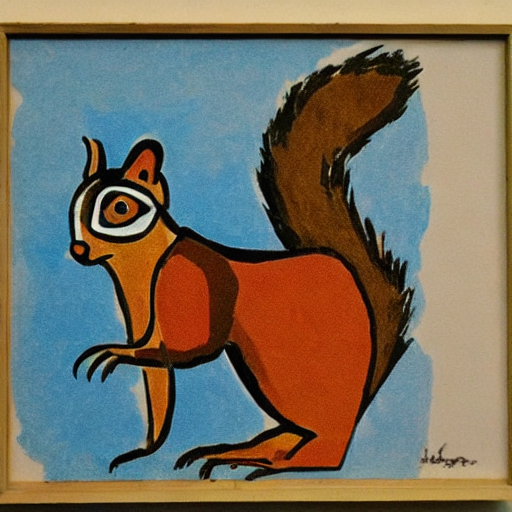

In [6]:
image = pipeline("An image of a squirrel in Picasso style").images[0]
image

<div class="flex justify-center">
    <img src="https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/image_of_squirrel_painting.png"/>
</div>

Save the image by calling `save`:

In [7]:
image.save("image_of_squirrel_painting.png")

### Local pipeline

You can also use the pipeline locally. The only difference is you need to download the weights first:

```bash
!git lfs install
!git clone https://huggingface.co/runwayml/stable-diffusion-v1-5
```

Then load the saved weights into the pipeline:

In [ ]:
# pipeline = DiffusionPipeline.from_pretrained("./stable-diffusion-v1-5")

Now you can run the pipeline as you would in the section above.

### Swapping schedulers

Different schedulers come with different denoising speeds and quality trade-offs. The best way to find out which one works best for you is to try them out! One of the main features of 🧨 Diffusers is to allow you to easily switch between schedulers. For example, to replace the default [PNDMScheduler](https://huggingface.co/docs/diffusers/main/en/api/schedulers/pndm#diffusers.PNDMScheduler) with the [EulerDiscreteScheduler](https://huggingface.co/docs/diffusers/main/en/api/schedulers/euler#diffusers.EulerDiscreteScheduler), load it with the [from_config()](https://huggingface.co/docs/diffusers/main/en/api/configuration#diffusers.ConfigMixin.from_config) method:

In [8]:
from diffusers import EulerDiscreteScheduler

pipeline = DiffusionPipeline.from_pretrained("runwayml/stable-diffusion-v1-5")
pipeline.scheduler = EulerDiscreteScheduler.from_config(pipeline.scheduler.config)

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


Try generating an image with the new scheduler and see if you notice a difference!

In the next section, you'll take a closer look at the components - the model and scheduler - that make up the [DiffusionPipeline](https://huggingface.co/docs/diffusers/main/en/api/pipelines/overview#diffusers.DiffusionPipeline) and learn how to use these components to generate an image of a cat.

  0%|          | 0/50 [00:00<?, ?it/s]

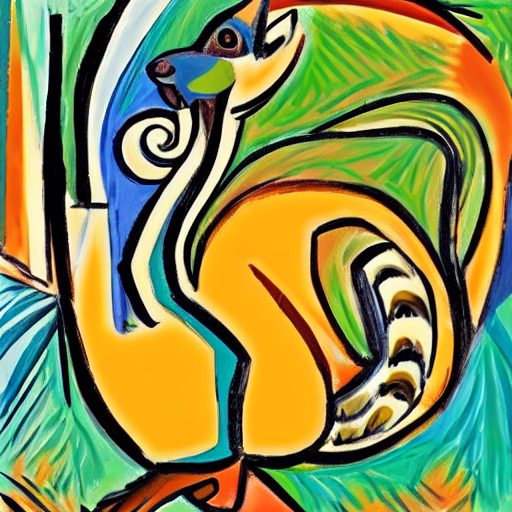

In [10]:
# copied from above ...
pipeline.to("cuda") # if we omit this step, then the pipeline runs on the CPU
image = pipeline("An image of a squirrel in Picasso style").images[0]
image

## Models

Most models take a noisy sample, and at each timestep it predicts the *noise residual* (other models learn to predict the previous sample directly or the velocity or [`v-prediction`](https://github.com/huggingface/diffusers/blob/5e5ce13e2f89ac45a0066cb3f369462a3cf1d9ef/src/diffusers/schedulers/scheduling_ddim.py#L110)), the difference between a less noisy image and the input image. You can mix and match models to create other diffusion systems.

Models are initiated with the [from_pretrained()](https://huggingface.co/docs/diffusers/main/en/api/models/overview#diffusers.ModelMixin.from_pretrained) method which also locally caches the model weights so it is faster the next time you load the model. For the quicktour, you'll load the [UNet2DModel](https://huggingface.co/docs/diffusers/main/en/api/models/unet2d#diffusers.UNet2DModel), a basic unconditional image generation model with a checkpoint trained on cat images:

In [ ]:
from diffusers import UNet2DModel

repo_id = "google/ddpm-cat-256"
model = UNet2DModel.from_pretrained(repo_id)

To access the model parameters, call `model.config`:

In [ ]:
model.config

The model configuration is a 🧊 frozen 🧊 dictionary, which means those parameters can't be changed after the model is created. This is intentional and ensures that the parameters used to define the model architecture at the start remain the same, while other parameters can still be adjusted during inference.

Some of the most important parameters are:

* `sample_size`: the height and width dimension of the input sample.
* `in_channels`: the number of input channels of the input sample.
* `down_block_types` and `up_block_types`: the type of down- and upsampling blocks used to create the UNet architecture.
* `block_out_channels`: the number of output channels of the downsampling blocks; also used in reverse order for the number of input channels of the upsampling blocks.
* `layers_per_block`: the number of ResNet blocks present in each UNet block.

To use the model for inference, create the image shape with random Gaussian noise. It should have a `batch` axis because the model can receive multiple random noises, a `channel` axis corresponding to the number of input channels, and a `sample_size` axis for the height and width of the image:

In [ ]:
import torch

torch.manual_seed(0)

noisy_sample = torch.randn(1, model.config.in_channels, model.config.sample_size, model.config.sample_size)
noisy_sample.shape

torch.Size([1, 3, 256, 256])

For inference, pass the noisy image to the model and a `timestep`. The `timestep` indicates how noisy the input image is, with more noise at the beginning and less at the end. This helps the model determine its position in the diffusion process, whether it is closer to the start or the end. Use the `sample` method to get the model output:

In [ ]:
with torch.no_grad():
    noisy_residual = model(sample=noisy_sample, timestep=2).sample

To generate actual examples though, you'll need a scheduler to guide the denoising process. In the next section, you'll learn how to couple a model with a scheduler.

## Schedulers

Schedulers manage going from a noisy sample to a less noisy sample given the model output - in this case, it is the `noisy_residual`.

<Tip>

🧨 Diffusers is a toolbox for building diffusion systems. While the [DiffusionPipeline](https://huggingface.co/docs/diffusers/main/en/api/pipelines/overview#diffusers.DiffusionPipeline) is a convenient way to get started with a pre-built diffusion system, you can also choose your own model and scheduler components separately to build a custom diffusion system.

</Tip>

For the quicktour, you'll instantiate the [DDPMScheduler](https://huggingface.co/docs/diffusers/main/en/api/schedulers/ddpm#diffusers.DDPMScheduler) with it's [from_config()](https://huggingface.co/docs/diffusers/main/en/api/configuration#diffusers.ConfigMixin.from_config) method:

In [ ]:
from diffusers import DDPMScheduler

scheduler = DDPMScheduler.from_config(repo_id)
scheduler

DDPMScheduler {
  "_class_name": "DDPMScheduler",
  "_diffusers_version": "0.13.1",
  "beta_end": 0.02,
  "beta_schedule": "linear",
  "beta_start": 0.0001,
  "clip_sample": true,
  "clip_sample_range": 1.0,
  "num_train_timesteps": 1000,
  "prediction_type": "epsilon",
  "trained_betas": null,
  "variance_type": "fixed_small"
}

<Tip>

💡 Notice how the scheduler is instantiated from a configuration. Unlike a model, a scheduler does not have trainable weights and is parameter-free!

</Tip>

Some of the most important parameters are:

* `num_train_timesteps`: the length of the denoising process or in other words, the number of timesteps required to process random Gaussian noise into a data sample.
* `beta_schedule`: the type of noise schedule to use for inference and training.
* `beta_start` and `beta_end`: the start and end noise values for the noise schedule.

To predict a slightly less noisy image, pass the following to the scheduler's [step()](https://huggingface.co/docs/diffusers/main/en/api/schedulers/ddpm#diffusers.DDPMScheduler.step) method: model output, `timestep`, and current `sample`.

In [ ]:
less_noisy_sample = scheduler.step(model_output=noisy_residual, timestep=2, sample=noisy_sample).prev_sample
less_noisy_sample.shape

The `less_noisy_sample` can be passed to the next `timestep` where it'll get even less noisier! Let's bring it all together now and visualize the entire denoising process.

First, create a function that postprocesses and displays the denoised image as a `PIL.Image`:

In [ ]:
import PIL.Image
import numpy as np


def display_sample(sample, i):
    image_processed = sample.cpu().permute(0, 2, 3, 1)
    image_processed = (image_processed + 1.0) * 127.5
    image_processed = image_processed.numpy().astype(np.uint8)

    image_pil = PIL.Image.fromarray(image_processed[0])
    display(f"Image at step {i}")
    display(image_pil)

To speed up the denoising process, move the input and model to a GPU:

In [ ]:
model.to("cuda")
noisy_sample = noisy_sample.to("cuda")

Now create a denoising loop that predicts the residual of the less noisy sample, and computes the less noisy sample with the scheduler:

In [ ]:
import tqdm

sample = noisy_sample

for i, t in enumerate(tqdm.tqdm(scheduler.timesteps)):
    # 1. predict noise residual
    with torch.no_grad():
        residual = model(sample, t).sample

    # 2. compute less noisy image and set x_t -> x_t-1
    sample = scheduler.step(residual, t, sample).prev_sample

    # 3. optionally look at image
    if (i + 1) % 50 == 0:
        display_sample(sample, i + 1)

Sit back and watch as a cat is generated from nothing but noise! 😻

<div class="flex justify-center">
    <img src="https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/diffusers/diffusion-quicktour.png"/>
</div>

## Next steps

Hopefully you generated some cool images with 🧨 Diffusers in this quicktour! For your next steps, you can:

* Train or finetune a model to generate your own images in the [training](https://huggingface.co/docs/diffusers/main/en/./tutorials/basic_training) tutorial.
* See example official and community [training or finetuning scripts](https://github.com/huggingface/diffusers/tree/main/examples#-diffusers-examples) for a variety of use cases.
* Learn more about loading, accessing, changing and comparing schedulers in the [Using different Schedulers](https://huggingface.co/docs/diffusers/main/en/./using-diffusers/schedulers) guide.
* Explore prompt engineering, speed and memory optimizations, and tips and tricks for generating higher quality images with the [Stable Diffusion](https://huggingface.co/docs/diffusers/main/en/./stable_diffusion) guide.
* Dive deeper into speeding up 🧨 Diffusers with guides on [optimized PyTorch on a GPU](https://huggingface.co/docs/diffusers/main/en/./optimization/fp16), and inference guides for running [Stable Diffusion on Apple Silicon (M1/M2)](https://huggingface.co/docs/diffusers/main/en/./optimization/mps) and [ONNX Runtime](https://huggingface.co/docs/diffusers/main/en/./optimization/onnx).